# Calculate Geodetic Distances and Midpoint
This notebook demonstrates how to use geographiclib to calculate distances and the midpoint of two lat/lon pairs.

In [5]:
# Geographiclib - https://geographiclib.sourceforge.io/Python/2.0/
# conda install conda-forge::geographiclib
from geographiclib.geodesic import Geodesic
geod = Geodesic.WGS84

## Define Transmit and Receive Station Locations

In [ ]:
call_0 = 'WWV'
lat_0  =   40.6683
lon_0  = -105.0384

call_1 = 'W2NAF'
lat_1  =  41.335116
lon_1  = -75.600692

## Calculate Distance and Azimuth

In [11]:
invl    = geod.InverseLine(lat_0,lon_0,lat_1,lon_1)
dist    = invl.s13*1e-3   # Distance in km
az      = invl.azi1

print('Transmitter: {!s}'.format(call_0))
print('Receiver:    {!s}'.format(call_1))
print('Distance:    {:0.1f} km'.format(dist))
print('Azimuth:     {:0.1f}\N{DEGREE SIGN}'.format(az))

Transmitter: WWV
Receiver:    W2NAF
Distance:    2465.9 km
Azimuth:     78.5°


## Calculate Midpoint

In [31]:
tmp = invl.Position(invl.s13/2,Geodesic.STANDARD)
lat_mid = tmp['lat2']
lon_mid = tmp['lon2']

print('The midpoint between {!s} and {!s} is ({:0.1f}\N{DEGREE SIGN}N, {:0.1f}\N{DEGREE SIGN}E).'.format(call_0,call_1,lat_mid,lon_mid))

The midpoint between WWV and W2NAF is (42.0°N, -90.4°E).


## Plot on a map

In [32]:
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt

import cartopy
import cartopy.crs as ccrs

%matplotlib inline

In [33]:
plt.rcParams['font.size']      = 18
plt.rcParams['font.weight']    = 'bold'
plt.rcParams['axes.titleweight']    = 'bold'
plt.rcParams['axes.grid']      = True
plt.rcParams['axes.xmargin']   = 0
plt.rcParams['grid.linestyle'] = ':'

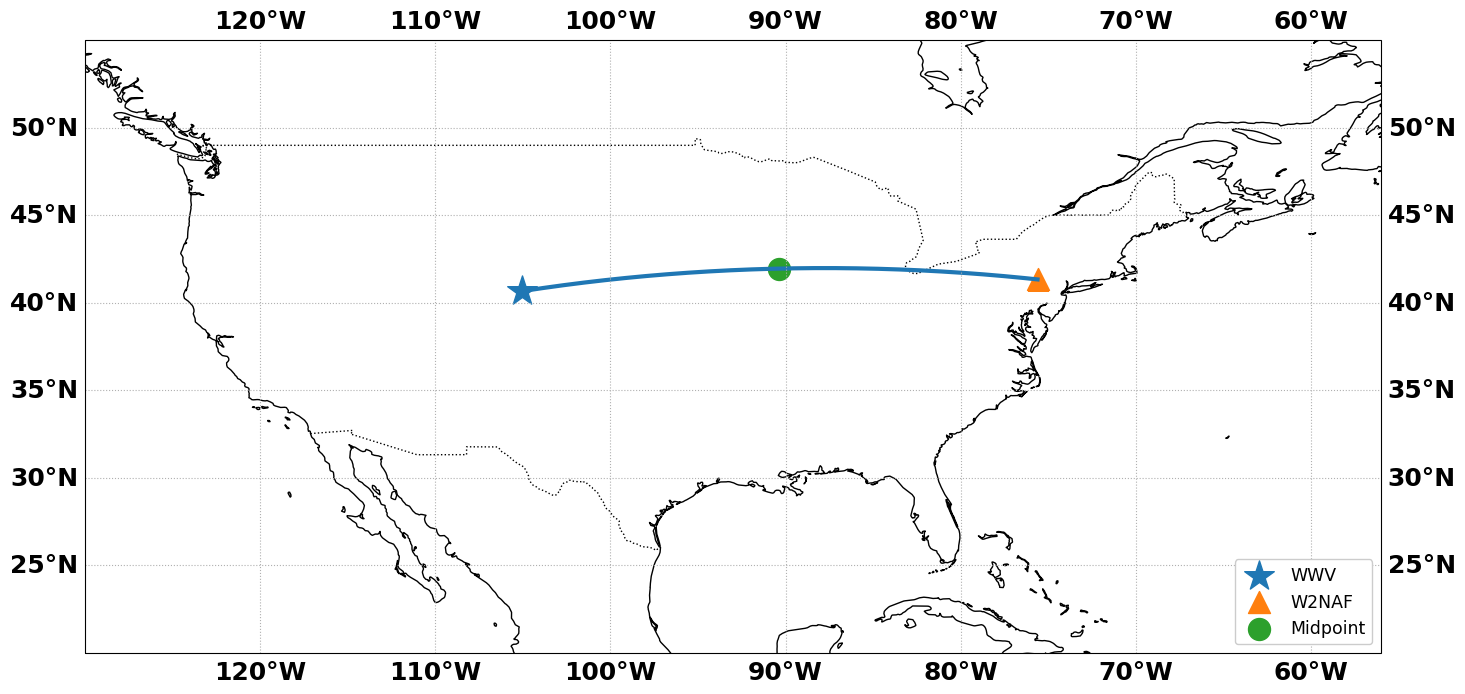

In [39]:
## World
#xlim    = (-180,180)
#ylim    = (-90,90)

## CONUS + Canada
#xlim    = (-130,-56)
#ylim    = (20,80)

# Continental US (CONUS)
xlim    = (-130,-56)
ylim    = (20,55)

fig     = plt.figure(figsize=(15,8))
ax      = fig.add_subplot(111,projection=ccrs.PlateCarree())

# Add markers for transmitter, receiver, and midpoint.
ax.scatter(lon_0,lat_0,marker='*',s=500,label=call_0)
ax.scatter(lon_1,lat_1,marker='^',s=250,label=call_1)
ax.scatter(lon_mid,lat_mid,s=250,label='Midpoint')

################################################################################
#Plot a smooth great circle path between transmitter and receiver.
# Determine the ranges and azimuth along the profile path.
range_step = 1.
ranges  = np.arange(0,dist,range_step)

glats   = []
glons   = []
for x in ranges:
    s   = min(x*1e3,invl.s13) # invl.s13 is the total line distance in m
    tmp = invl.Position(s,Geodesic.STANDARD)
    glat        = tmp['lat2']
    glon        = tmp['lon2']

    glats.append(glat)
    glons.append(glon)

ax.plot(glons,glats,lw=3,transform=ccrs.PlateCarree())
################################################################################


ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.set_title('')
ax.gridlines(draw_labels=True)
ax.legend(loc='lower right',prop={'size':'x-small','weight':'normal'},framealpha=1)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.tight_layout()
plt.show()